# Working with data 2019
## Contact
Javier Garcia-Bernardo
garcia@uva.nl

## MONDAY 
1. RECAP
    - 1.1 Maps
    - 1.2 Regressions
        - 1.2.1 Summary
        - 1.2.2 Interpretation
2. Dealing with time series
3. Panel models


## WEDNESDAY
- Assumptions of linear regression (OLS)
    - A) Linearity and additive terms: 
        - Check: Residuals vs fitted values, also the cond number is affected
        - Solution if it doesn't hold: Transform variables (e.g. log(x)) or add interaction terms.
    - B) No autocorrealtion in residuals:
        - Check: The Durbin – Watson (DW) statistic should be close to 2
        - Solution: Add/Drop a variable. Use panel models.
    - C) Homoskedasticity (the residuals must have constant variances).
        - Check: Residuals vs fitted values. Use a correlation table.
        - Solution: Add/Drop variables
    - D) Normality in the residuals:
        - Check: QQ plot
        - Solution: Transform your variables (np.log(x), np.exp(x), it depends on the shape of your distribution) Related to assumption 1 
    - E) No multicollinearity (no high correlation in the independent variables):
        - Check: Condition number should be lower than 30-100
        - Solution: Drop/combine independent varialbes    
    - F) No outliers
        - Check: Cook's distance
        - Solution: It depends...

In [1]:
##Some code to run at the beginning of the file, to be able to show images in the notebook
##Don't worry about this cell

#Print the plots in this screen
%matplotlib inline 

#Be able to plot images saved in the hard drive
from IPython.display import Image 

#Make the notebook wider
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:90% !important; }</style>"))

import seaborn as sns
import pylab as plt
import pandas as pd
import numpy as np
import scipy.stats

#Impor
import statsmodels.formula.api as smf
import statsmodels.api as sm

/opt/anaconda/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/anaconda/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
def qq_plot(x):
    (osm, osr),(slope, intercept, r)  = scipy.stats.probplot(x, dist='norm', plot=None)
    plt.plot(osm, osr, '.', osm, slope*osm + intercept)
    plt.xlabel('Quantiles',fontsize=14)
    plt.ylabel('Quantiles Obs',fontsize=14)  

# 1. Linear Regression
## 1.1 Assumptions

- Base: i.i.d. (independent and identically distributed) residuals. This comes from the data collection:
    - Each observation is independent
    - There are no subpopulations in the population


- A) Linearity and additive terms: 
    - Check: Residuals vs fitted values, also the cond number is affected
    - Solution if it doesn't hold: Transform variables (e.g. log(x)) or add interaction terms.
- B) No autocorrealtion in residuals:
    - Check: The Durbin – Watson (DW) statistic should be close to 2
    - Solution: Add/Drop a variable. Use panel models.
- C) Homoskedasticity (the residuals must have constant variances).
    - Check: Residuals vs fitted values. Use a correlation table.
    - Solution: Add/Drop variables
- D) Normality in the residuals:
    - Check: QQ plot
    - Solution: Transform your variables (np.log(x), np.exp(x), it depends on the shape of your distribution) Related to assumption 1 
- E) No multicollinearity (no high correlation in the independent variables):
    - Check: Condition number should be lower than 30-100
    - Solution: Drop/combine independent varialbes    
- F) No outliers
    - Check: Cook's distance
    - Solution: It depends...

- While normality of independent variables is not an assumption, it make the other assumptions easier
- For Logistic Regression, assumptions B, C and D are not required. A is linear in log-odds.

Source: https://www.analyticsvidhya.com/blog/2016/07/deeper-regression-analysis-assumptions-plots-solutions/

In [26]:
#Imports needed
import statsmodels.formula.api as smf
import statsmodels.api as sm

### Example: Check if the market capitalization of a company depends on the revenue

In [3]:
df = pd.read_csv("./data/big3_position.csv",sep="\t").dropna()
df = df.sort_values(by="Revenue")
df.head()

,Company_name,Company_ID,Big3Share,Position,Revenue,Assets,Employees,MarketCap,Exchange,TypeEnt
3646,"CYMABAY THERAPEUTICS, INC.",US943103561,0.44,23,0.0,43079.0,21.0,56976.0,NASDAQ National Market,Industrial company
2460,IMMUNE PHARMACEUTICALS INC,US521841431,0.71,9,0.0,36184.0,12.0,8599.0,NASDAQ National Market,Industrial company
191,GALECTIN THERAPEUTICS INC.,US043562325,0.32,14,0.0,26408.0,7.0,42889.0,NASDAQ National Market,Industrial company
1774,"BELLEROPHON THERAPEUTICS, INC.",US364771642,0.94,15,0.0,38409.0,22.0,15631.0,NASDAQ National Market,Industrial company
2217,"CONTRAVIR PHARMACEUTICALS, INC.",US462783806,0.26,7,0.0,5377.0,14.0,29330.0,NASDAQ National Market,Industrial company


## Summary gives us info about assumptions

    Normality: Jarque-Bera (smallest = better). OLS is pretty robust to deviations and this test will almost always be significant.
    Auto-correlations of residuals: Durbin-Watson: [0-4]. 2 = no auto-correlation of residuals
    Normality of residuals: Omnibus (smallest = better)
    Multicollinearity: Cond. No. (smallest = better)


In [4]:
#How to run a regression (be careful, this is wrong)
mod = smf.ols(formula='MarketCap ~ Revenue + Employees', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              MarketCap   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     1672.
Date:                Tue, 29 Jan 2019   Prob (F-statistic):               0.00
Time:                        23:34:54   Log-Likelihood:                -56798.
No. Observations:                3136   AIC:                         1.136e+05
Df Residuals:                    3133   BIC:                         1.136e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.266e+06   3.27e+05      6.933      0.0

In [5]:
#Our independent variables are highly correlated
scipy.stats.pearsonr(df["Revenue"],df["Employees"])

(0.7531530375718251, 0.0)

/opt/anaconda/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


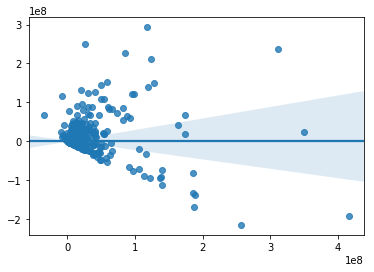

In [6]:
#Residuals vs fitted
sns.regplot(res.fittedvalues,res.resid)
#plt.scatter(res.predict(), res.resid)

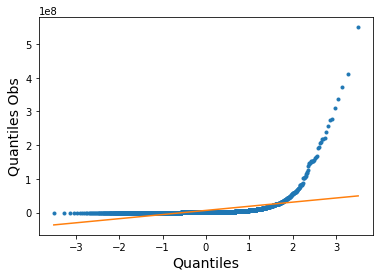

In [7]:
#And it's caused by this -> Very very far from normal, it's not additive
qq_plot(df["MarketCap"])

## Fix: Transform varialbes

In [8]:
df["log_MarketCap"] = np.log10(df["MarketCap"])
df["log_Revenue"] = np.log10(df["Revenue"])
df["log_Employees"] = np.log10(df["Employees"])
df = df.loc[np.isfinite(df["log_MarketCap"])]
df = df.loc[np.isfinite(df["log_Revenue"])]

/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


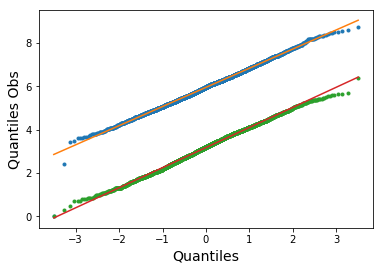

In [9]:
#And it's caused by this -> Very very far from normal, it's not additive
qq_plot(df["log_MarketCap"])
qq_plot(df["log_Employees"])

In [10]:
#This now owrks
mod = smf.ols(formula='log_MarketCap ~ log_Employees + log_Revenue ', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          log_MarketCap   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     2198.
Date:                Tue, 29 Jan 2019   Prob (F-statistic):               0.00
Time:                        23:34:55   Log-Likelihood:                -2553.8
No. Observations:                3013   AIC:                             5114.
Df Residuals:                    3010   BIC:                             5132.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.2259      0.066     33.841

# Fit diagnostiscs 


### A. Linearity and additive 
- No weird shape, regression line around zero -> Good

/opt/anaconda/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Fitted values')

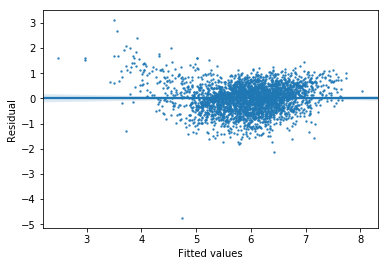

In [11]:
sns.regplot(res.fittedvalues,res.resid,scatter_kws={"s":2})
plt.ylabel('Residual')
plt.xlabel('Fitted values')


### B. Auto-correalation
- Durbin-Watson:                   1.996 --> Good

### C. Homoskedasticity in residuals
- Residuals look good

### D. Normality in residuals
- Residuals look good

/opt/anaconda/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(-3, 3)

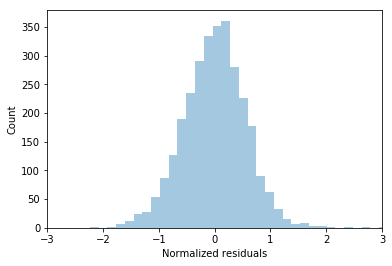

In [12]:
#Normality
sns.distplot(res.resid,kde=False)
plt.ylabel('Count')
plt.xlabel('Normalized residuals')
plt.xlim((-3,3))

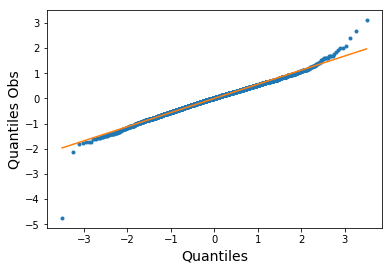

In [13]:
#Normality 2
qq_plot(res.resid)

### E. No multicollinearity among independent variables
- Cond. No. 11.8 --> Good
- Only one variable so it's okay. Otherwise a correlation plot / scatter matrix help


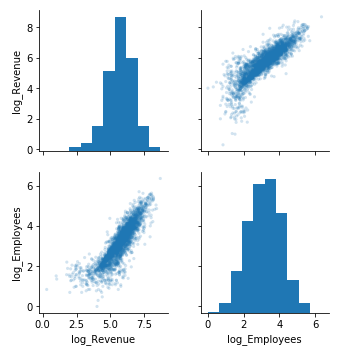

In [14]:
indep = df.loc[:,["log_Revenue","log_Employees"]]
sns.pairplot(indep,
             plot_kws={"s":10,"edgecolor":"none","alpha":0.2}) #modifying a bit the output

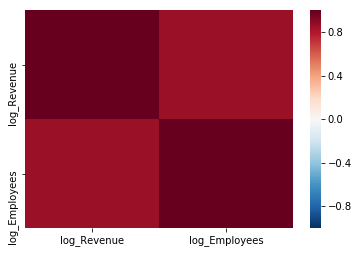

In [15]:
sns.heatmap(indep.corr(),vmin=-1,vmax=1,cmap="RdBu_r")

### E. No outliers
    Check: Cook's distance
    Solution: It depends...


#### Cooks distance 
- Estimate of the influence of a data point when performing a least-squares regression analysis
- Cook's distance measures the effect of deleting a given observation

Text(0.5, 0, 'Observation')

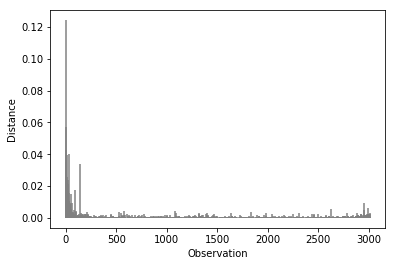

In [16]:
#Larger cook distance, larger influence
influence = res.get_influence()
(c, p) = influence.cooks_distance
plt.vlines(np.arange(len(c)), ymin=0, ymax=c,color="gray")
plt.ylabel("Distance")
plt.xlabel("Observation")

In [17]:
#zip influences and index from df, then sort
inf = sorted(zip(c,df.index))
#reverse sort
inf = inf[::-1]
#print
inf[:4]

[(0.12427995354830426, 265),
 (0.05698155889967581, 1771),
 (0.04243436804616405, 1260),
 (0.04023492037577597, 1333)]

In [18]:
df.loc[265]

Company_name     ACADIA PHARMACEUTICALS INC.
Company_ID                       US061376651
Big3Share                              12.28
Position                                   4
Revenue                                   61
Assets                                221896
Employees                                160
MarketCap                        4.02974e+06
Exchange              NASDAQ National Market
TypeEnt                   Industrial company
log_MarketCap                        6.60528
log_Revenue                          1.78533
log_Employees                        2.20412
Name: 265, dtype: object

In [19]:
df.loc[1771]

Company_name     INTRA-CELLULAR THERAPIES, INC.
Company_ID                          US364742850
Big3Share                                 13.28
Position                                      4
Revenue                                      91
Assets                                   484104
Employees                                    37
MarketCap                           1.61388e+06
Exchange                 NASDAQ National Market
TypeEnt                      Industrial company
log_MarketCap                           6.20787
log_Revenue                             1.95904
log_Employees                            1.5682
Name: 1771, dtype: object

**Leverage**
- How far away the independent variable values of an observation are from those of the other observations. 
- If high leverage (no neighbors) and high residual --> Will have a big impact

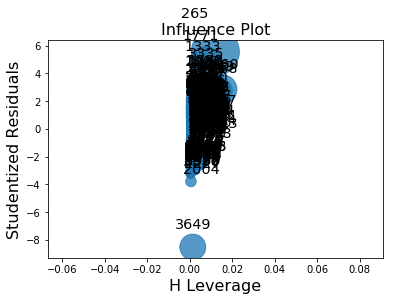

In [20]:
#Larger leverage, larger influence. 
#If high residual and high leverage -> Probably affecting the model
from statsmodels.graphics.regressionplots import *
influence_plot(res)
plt.show()


In [21]:
df.loc[3649]

Company_name                  FINET COM INC
Company_ID                      US943115180
Big3Share                                 0
Position                                100
Revenue                                7813
Assets                                17255
Employees                                81
MarketCap                                 1
Exchange         NASDAQ/NMS (Global Market)
TypeEnt                   Financial company
log_MarketCap                             0
log_Revenue                         3.89282
log_Employees                       1.90849
Name: 3649, dtype: object

#### Confidence intervals

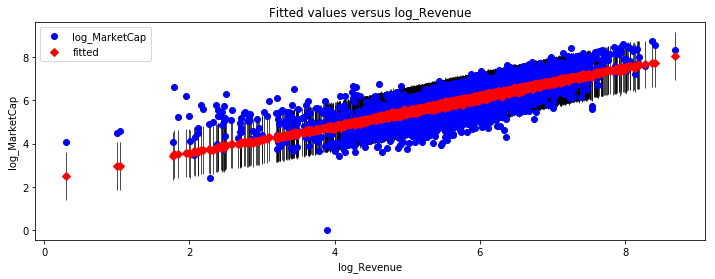

In [41]:
#Create figure
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111)

#For the variable log_Revenue
_ = sm.graphics.plot_fit(res, "log_Revenue", ax=ax)

More diagnostics:
http://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html

**Robust linear regression**
- Handles outliers automatically (~ takes the median of the slopes of each pairs of points)

In [42]:
#This uses robust regression
mod_r = smf.rlm(formula='log_MarketCap ~ log_Employees + log_Revenue ', data=df)
res_r = mod_r.fit()
print(res_r.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:          log_MarketCap   No. Observations:                 3013
Model:                            RLM   Df Residuals:                     3010
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 29 Jan 2019                                         
Time:                        23:39:18                                         
No. Iterations:                    25                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.8362      0.063     29.076

---

In [ ]:
print("Linear models...")
Image("https://proxy.duckduckgo.com/iu/?u=https%3A%2F%2Fimage.shutterstock.com%2Fimage-photo%2Felephant-calm-room-photo-combination-260nw-329183501.jpg")

    ### The world is non-linear and non-additive
    - Stock market crash (when can they happen)
    - Collapse of civilizations (what conditions are needed)
    - Innovation (where do ideas come from)
    - Revolutions (why some start and some don't)